# Capstone Project - Predictive Undewriting Decision Model

## Table of Contents
- [Introduction](#Introduction)
- [Problem Statement](#Problem-Statement)
- [Importing the libraries](#Importing-the-libraries)
- [Importing the datasets](#Importing-the-datasets)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data cleaning](#Data-cleaning)

# Introduction

* **Background & context**

    The conventional way of purchasing a life policy involves many steps starting from deciding on how much and what type of coverage is needed. The potential applicant will then select a suitable product for his needs. Next, the applicant would be required to fill out the application form as well as to schedule for a life insurance medical examination where necessary. Typically, the application form will consist of questions related to the applicants profile (Age, weight, height, occupation),current and past health conditions, family medical history and existing insurance cover. Upon receipt of the applicant's application, the application will be underwritten. During which the underwriter will consult an actuarial table. This resource enables the underwriter to see the mortality probability of the applicant. The higher that probability, the higher your premium will likely be. Following which, taking everything into consideration, the underwriter will issue the applicant an insurance classification rating such as a "Preferred, Standard Plus, Standard, Substandard". Generally, these classification exists for both smokers and nonsmokers having serperate rates.

    Increased data availability, and the improved efficacy of machine learning techniques in handling complex data and processing natural languages, mean we are on the horizon of being able to drastically simplify the underwriting journey, with limited or no impact on the risk profile. Combining a simple questionnaire with external data sources should enable insurers to accurately assess risk and make instant decisions in almost all applications.
    

* **What is this project about?**

    The aim of the project is to provide a demonstration of how ML techniques can be used to predict underwriting decision for life insurance applicants, which could then in turn support underwriters in their decision-making process on how prospective new business should be valued. This model may then be implemented into the business process be it through providing an early glimpse of the likely underwriting result or implemented as part of the decision classifier model of a Straight Through Processing ("STP") chain.
    
    As a case study, we will use the dataset featured in the Prudential Life Insurance Assessment competition previously hosted on Kaggle, and showcase how ML classifiers can be used to quantitatively assess risk and ultimately provide us with an underwriting decision.

# Problem Statement

At present, Underwriters in the Life Insurance industry review all Policy applications manually. This results in inefficiencies, inaccuracies and overall longer turnaround times before Policies are issued but are a necessary exercise for direct life insurance underwriters. 

Through our machine learning model, we will develop a supervised machine learning model to predict the underwriting decision for new applicants based on the data completed in their application form. This will in-turn help alleviate some manpower off from the auto-accepted applications. Radically Improve Efficiency, Accuracy, and Speed of Life Insurance Underwriting with Machine Learning

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
pd.pandas.set_option('display.max_columns', None)
#to display max rows
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

## Importing the datasets

In [2]:
df = pd.read_csv('./data/train.csv')
print(f'The training data has {df.shape[0]} rows and {df.shape[1]} columns')

df_test = pd.read_csv('./data/test.csv')
print(f'The training data has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The training data has 59381 rows and 128 columns
The training data has 19765 rows and 127 columns


In [3]:
df.info()
print("----------------------------")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB


In [4]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [5]:
df_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,2,2,1,3,1,2,2,NaN,3,2,1,3,NaN,1,2,1,1,2,1,2,1,NaN,2,2,1,1,3,2,3,NaN,3,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,3,1,1,3,2,2,1,NaN,3,2,3,3,110.0,3,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,2,1,1,3,2,2,2,NaN,3,2,3,3,240.0,1,3,1,1,2,1,2,3,NaN,2,2,3,1,1,2,3,NaN,1,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,3,2,1,1,2,3,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,2,3,2,3,NaN,3,1,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,3,1,1,3,2,2,2,NaN,3,2,3,3,188.0,1,3,1,1,2,1,2,1,NaN,1,3,3,1,1,2,3,NaN,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# checking data for any odd values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.000000
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.000000
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.000000
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.000000
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.000000
Product_Info_6,59381.0,2.673599,0.739103,1.0,3.000000,3.000000,3.000000,3.000000
Product_Info_7,59381.0,1.043583,0.291949,1.0,1.000000,1.000000,1.000000,3.000000
Ins_Age,59381.0,0.405567,0.197190,0.0,0.238806,0.402985,0.567164,1.000000
Ht,59381.0,0.707283,0.074239,0.0,0.654545,0.709091,0.763636,1.000000
Wt,59381.0,0.292587,0.089037,0.0,0.225941,0.288703,0.345188,1.000000


There are around 128 features. From the dataset, we note that some of  and on a very broad level, based on these can be categorized into:

1. Product Information 
2. Application Basic Information (Height, Weight & BMI)
3. Employment Information
4. Other insured information
5. Family History
6. Medical History
7. Medical Keywords

"Response" is the target variable in the data. Let's see the value counts of the target variable

In [7]:
#value counts of response
df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

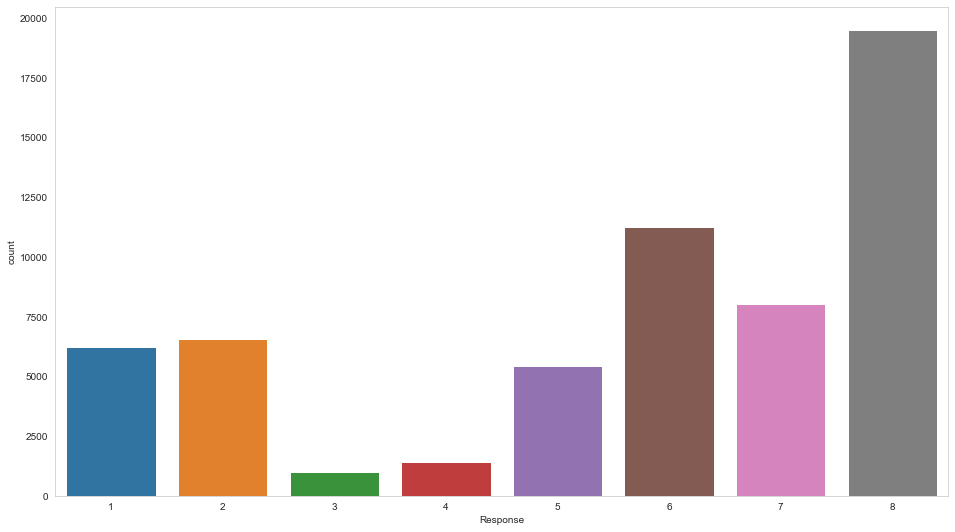

In [8]:
#plot response into bar chart for ease of visualization
plt.figure(figsize=(16,9))
sns.countplot(x=df['Response']);

We can see that Class 8 has the highest distribution. We will assume this as clean and accepted policies on standard underwriting terms. Rest other classes can be considered as policies rejected or accepted at extra terms and conditions.

It is also worth noting that the distribution is unbalanced and is skewed towards class 6-8, although classes 1 & 2 also account for a notable proportion of the dataset. 

**For the purpose of this analysis**, we will turn the multiclass classification problem to binary classification problem. We can see (ref. below) that class 8 has the highest number of records which suggests that these are clean and accepted records (i.e. policy issued to these lives on standard or preferred terms). Rest of the other classes can be considered as a declined application with no policy issuance.

### Converting the multiclass classification problem into a binary classification problem

In [9]:
#create a funtion to create new target variable based on conditions
# 0 means reject
# 1 means accept

def new_target(row):
    if (row['Response']<=7):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=2
    return val

#create a new column for new response
df['New_Response']=df.apply(new_target, axis = 1)

Unique values in Target Variable: [1 0]
Total Number of unique values : 2


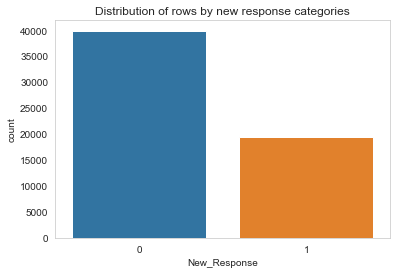

In [10]:
#print unique values of target variable
print("Unique values in Target Variable: {}".format(df['New_Response'].unique()))
print("Total Number of unique values : {}".format(len(df['New_Response'].unique())))

#distribution plot for target classes
sns.countplot(x= df['New_Response']).set_title("Distribution of rows by new response categories");

In [11]:
#drop the initial response to be replaced with New_Response later
df.drop(['Response'], axis=1, inplace=True)

In [12]:
#replacing the New_Response to Response
df.rename(columns = {'New_Response':'Response'}, inplace=True)

In [13]:
#check output of response
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
#value counts of response
df['Response'].value_counts()

0    39892
1    19489
Name: Response, dtype: int64

### Verifying Conversion/Sense check

Based on my industry knowledge, we know that these are high risk policies:

1. Old Age
2. Obese persons

We will therefore explore our new target response by creating new features to categorize individuals within their applicant profiles. 

Lets verify if our assumption when converting the policies on accept/ decline basis are accurate/correct.

In [15]:
# we will create diff types to measure the true response rate against these categories based on quantile ranges.
# we will then explore the response against the new categories based on the quantile ranges created.

# BMI Categorization
conditions = [
    (df['BMI'] <= df['BMI'].quantile(0.25)),
    (df['BMI'] > df['BMI'].quantile(0.25)) & (df['BMI'] <= df['BMI'].quantile(0.75)),
    (df['BMI'] > df['BMI'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

df['BMI_types'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (df['Ins_Age'] <= df['Ins_Age'].quantile(0.25)),
    (df['Ins_Age'] > df['Ins_Age'].quantile(0.25)) & (df['Ins_Age'] <= df['Ins_Age'].quantile(0.75)),
    (df['Ins_Age'] > df['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
df['Age_types'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (df['Ht'] <= df['Ht'].quantile(0.25)),
    (df['Ht'] > df['Ht'].quantile(0.25)) & (df['Ht'] <= df['Ht'].quantile(0.75)),
    (df['Ht'] > df['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

df['Height_types'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (df['Wt'] <= df['Wt'].quantile(0.25)),
    (df['Wt'] > df['Wt'].quantile(0.25)) & (df['Wt'] <= df['Wt'].quantile(0.75)),
    (df['Wt'] > df['Wt'].quantile(0.75))]

choices = ['underweight', 'average', 'overweight']

df['Weight_types'] = np.select(conditions, choices)

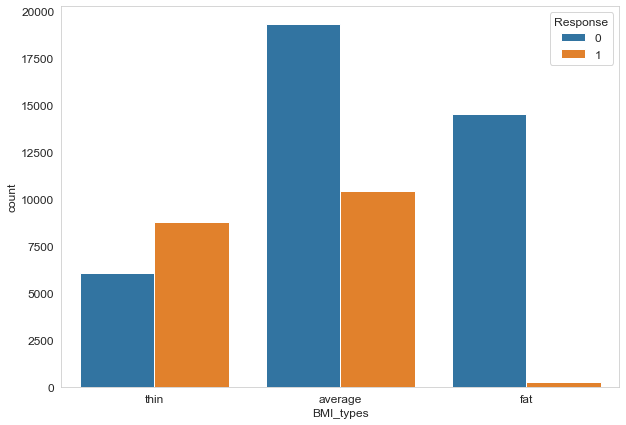

In [16]:
#applicant BMI category vs decision
plt.figure(figsize=(10,7))
font = {'size':12}
plt.rc('font', **font)

sns.countplot(x = 'BMI_types', hue = 'Response', data = df);

From the above, it seems that high BMI count (classified as fat individuals) are not likely to be offered a straight through policy. This is logical as obseity comes with increased risk factors.

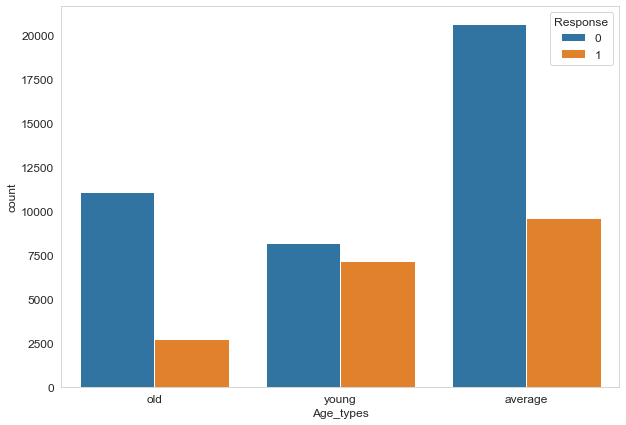

In [17]:
#applicant Age category vs decision
plt.figure(figsize=(10,7))
plt.rc('font', **font)

sns.countplot(x = 'Age_types', hue = 'Response', data = df);

Compared to younger and average lives, old lives are likely like to get offered standard terms. This also is logical as we are more prone to higher risk/diseases as we age.

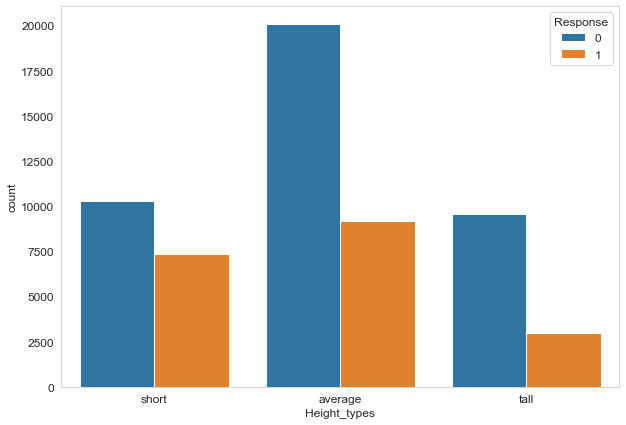

In [18]:
#applicant height category vs decision
plt.figure(figsize=(10,7))
sns.countplot(x = 'Height_types', hue = 'Response', data = df);

From our height category, we do not note any specific bias/behaviour. 

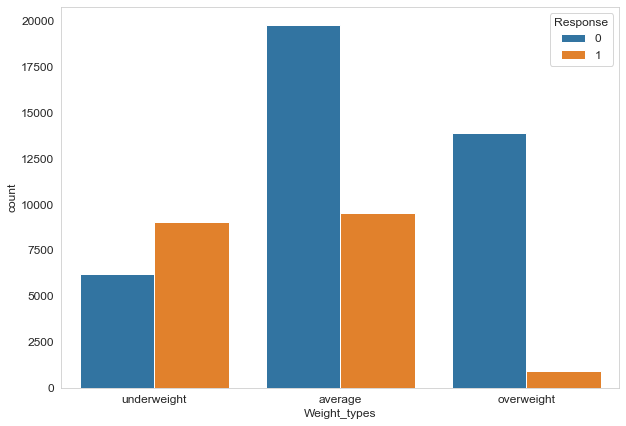

In [19]:
#applicant weight category vs decision
plt.figure(figsize=(10,7))
sns.countplot(x = 'Weight_types', hue = 'Response', data = df);

Similar to BMI, overweight applicants are not likely to be offered a straight through policy.

In [20]:
# lets group all our "High risk" features such as fat, old age and overweight to get an overview of the response
#function to group all "high risk" factors from analysis above
def risk_target(row):
    if (row['BMI_types']=='fat') or (row['Age_types']=='old') or (row['Weight_types']=='overweight'):
        val='High_risk'
    else:
        val='Not_high_risk'
    return val

#new DF for high risk
df['risk_cat'] = df.apply(risk_target, axis=1)

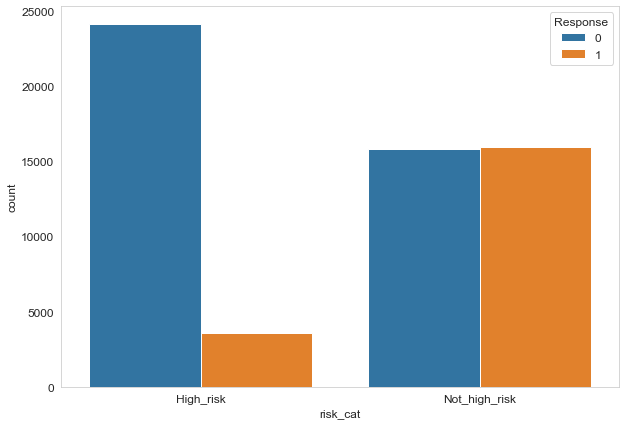

In [21]:
#plotting by risk categories
plt.figure(figsize=(10,7))
sns.countplot(x = 'risk_cat', hue = 'Response', data = df);

From this, we note that high risk policies are high in rejected (0) response. While we note that not high risk factors do still have a relatively high rejection rate as well, these may be contributed to our categorization of quantiles above. Overall, one a general high level view, we may choose to proceed with our assumption of 1 = accept , 0 = decline binary classifcation problem.

# Exploratory Data Analysis

In [22]:
# From the dataset, we can note that the features can grouped into specific application categories.
# Split out the full set of the main dataset's columns into separate lists for easier use.

Group_ProdInfo = ['Product_Info_1','Product_Info_2','Product_Info_3',
                    'Product_Info_4','Product_Info_5','Product_Info_6',
                    'Product_Info_7']

Group_ApplicantInfo = ['Ins_Age','Ht','Wt','BMI']

Group_EmploymentInfo = ['Employment_Info_1','Employment_Info_2','Employment_Info_3',
                          'Employment_Info_4','Employment_Info_5','Employment_Info_6']

Group_InsuredInfo = ['InsuredInfo_1','InsuredInfo_2','InsuredInfo_3',
                       'InsuredInfo_4','InsuredInfo_5','InsuredInfo_6',
                       'InsuredInfo_7']

Group_InsuranceHistoryInfo = ['Insurance_History_1','Insurance_History_2','Insurance_History_3'
                                ,'Insurance_History_4','Insurance_History_5','Insurance_History_7',
                                'Insurance_History_8','Insurance_History_9']

Group_FamilyHistoryInfo = ['Family_Hist_1','Family_Hist_2','Family_Hist_3',
                             'Family_Hist_4','Family_Hist_5']

Group_MedicalHistoryInfo = ['Medical_History_1','Medical_History_2','Medical_History_3',
                              'Medical_History_4','Medical_History_5','Medical_History_6',
                              'Medical_History_7','Medical_History_8','Medical_History_9',
                              'Medical_History_10','Medical_History_11','Medical_History_12',
                              'Medical_History_13','Medical_History_14','Medical_History_15',
                              'Medical_History_16','Medical_History_17','Medical_History_18',
                              'Medical_History_19','Medical_History_20','Medical_History_21',
                              'Medical_History_22','Medical_History_23','Medical_History_24',
                              'Medical_History_25','Medical_History_26','Medical_History_27',
                              'Medical_History_28','Medical_History_29','Medical_History_30',
                              'Medical_History_31','Medical_History_32','Medical_History_33',
                              'Medical_History_34','Medical_History_35','Medical_History_36',
                              'Medical_History_37','Medical_History_38','Medical_History_39',
                              'Medical_History_40','Medical_History_41']

Group_MedicalKeywordInfo = ['Medical_Keyword_1','Medical_Keyword_2','Medical_Keyword_3',
                              'Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6',
                              'Medical_Keyword_7','Medical_Keyword_8','Medical_Keyword_9',
                              'Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12',
                              'Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15',
                              'Medical_Keyword_16','Medical_Keyword_17','Medical_Keyword_18',
                              'Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21',
                              'Medical_Keyword_22','Medical_Keyword_23','Medical_Keyword_24',
                              'Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27',
                              'Medical_Keyword_28','Medical_Keyword_29','Medical_Keyword_30',
                              'Medical_Keyword_31','Medical_Keyword_32','Medical_Keyword_33',
                              'Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36',
                              'Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39',
                              'Medical_Keyword_40','Medical_Keyword_41','Medical_Keyword_42',
                              'Medical_Keyword_43','Medical_Keyword_44','Medical_Keyword_45',
                              'Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']


We will generate Kernel Density Estimate (KDE) plots for each of the features - where Response is set as the hue of each curve - in order to compare the distributions across each risk rating, and to understand whether there are any trends/correlations within the data.

Also, as we have grouped them into categories above, we should be able to understand whether there are any trends/correlations for specific groups if present.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


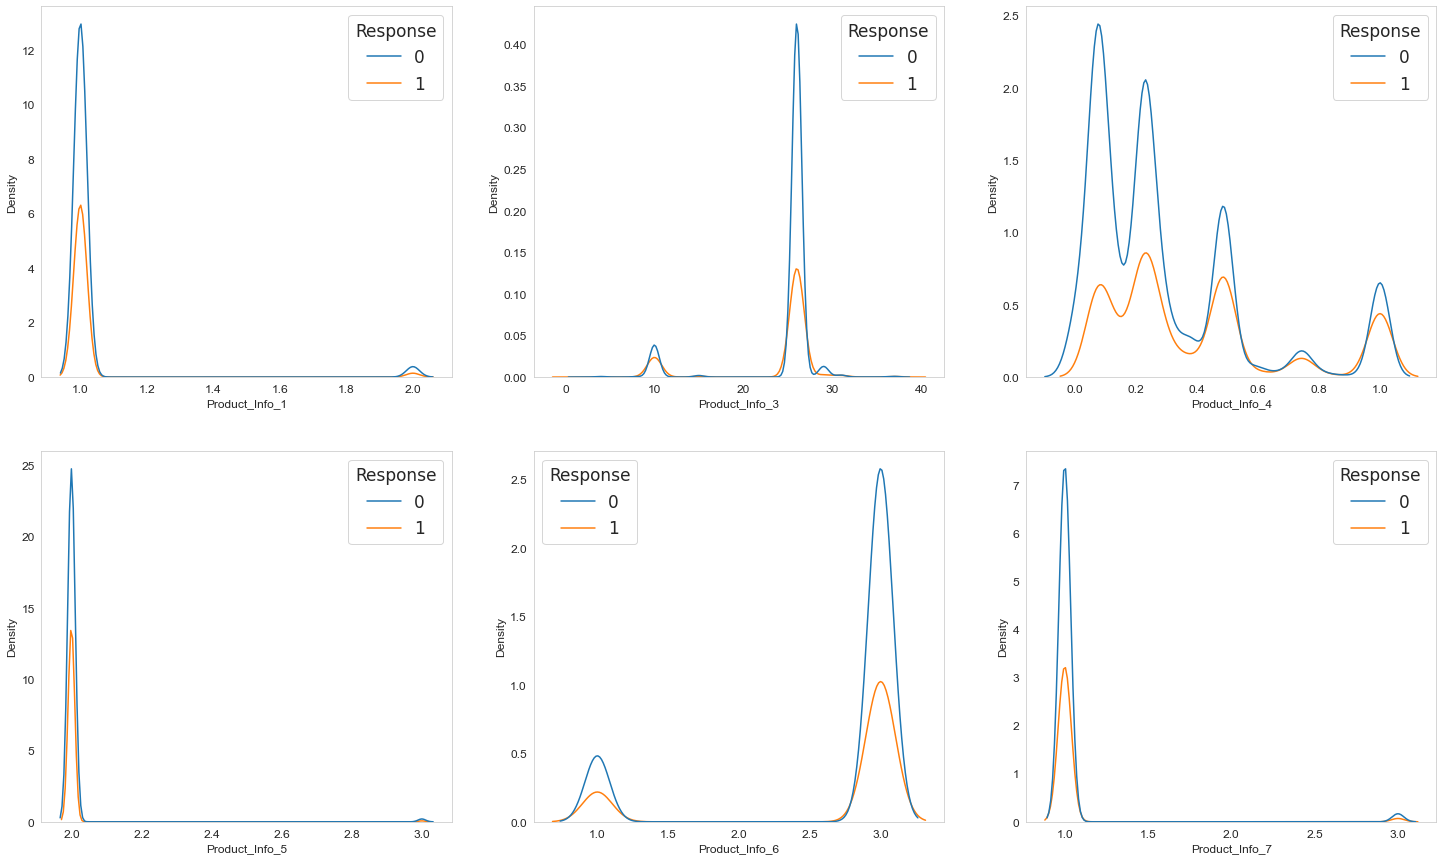

In [23]:
# plot KDEplot for each set of columns in Productinfo listing.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

#note that Product_Info_2 has been excluded as its values has not been encoded into numeric values yet
EDA_Group_ProdInfo = ['Product_Info_1','Product_Info_3',
                    'Product_Info_4','Product_Info_5','Product_Info_6',
                    'Product_Info_7']

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}

plt.rc('font', **font)
for i, column in enumerate(df[EDA_Group_ProdInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//3,i%3])

These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each Response group/cohort of applicants, with no major difference in relative densities. The intepretation of these results represents that it is unlikely that these product_info differences will greatly affect or help towards predicting the applicants risk rating.

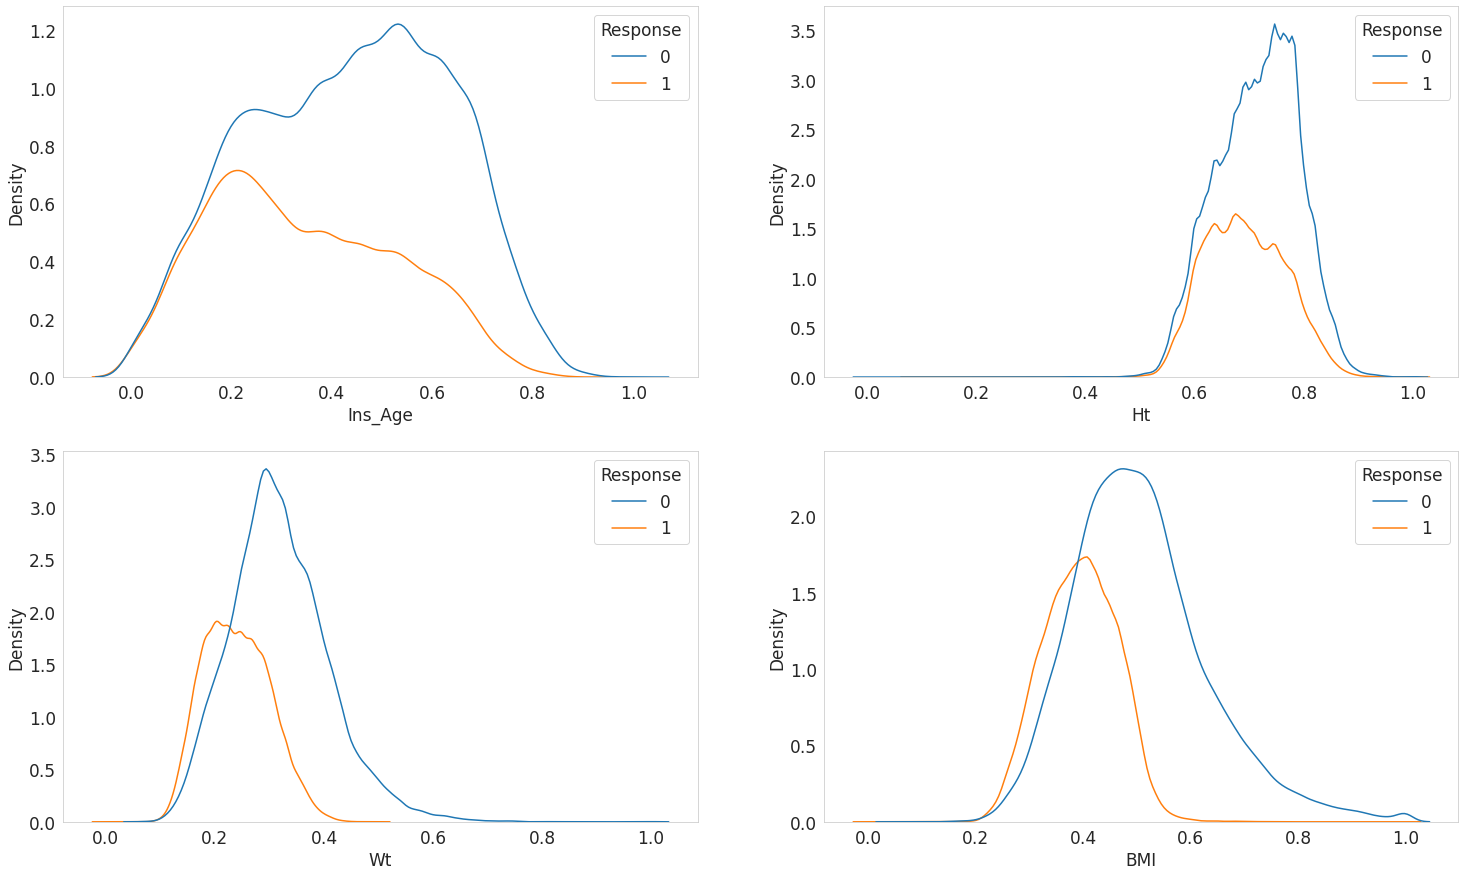

In [24]:
# plot histplot for each set of columns in ApplicantInfo listing.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
plt.rc('font', **font)
for i, column in enumerate(df[Group_ApplicantInfo].columns):
    sns.kdeplot(data=df, x=column, hue="Response", ax=axes[i//2,i%2])

**Ins_Age**: This KDE plot displays significant variation in each Response group distribution's composition and structure, where each peak exhibits both broadening and shouldering. Whilst the majority of the distribution density is spread between x=0 and x=0.9, each cohort's distribution does vary somewhat in shape and skew - for instance, class 1 features positive skew towards x=0.2 whereas class 0 is negatively skewed towards x=0.6.

**Ht**: This KDE plot displays significant variation in each Response group distribution's composition and structure. The majority of the distribution density is spread between x=0.6 and x=0.8, and each response skew is similar to that shown in Ins_Age (i.e. positive for class 1, negative for class 0).

**Wt**: This KDE plot displays significant variation in each Response group distribution's composition and structure. The majority of the distribution density is spread between x=0.1 and x=0.5. The distribution for class 1 is notably centred around low values of Wt (x=0.1), whereas the remainder of the population for class 0 is mostly centered around x=0.3 area.

**BMI**: This KDE plot displays significant variation in each Response group distribution's composition and structure, where each peak exhibits both broadening and shouldering. The majority of the distribution density is spread in a similar fashion to Wt - class 1's peak is centred at x=0.4 whereas class 0's distributions is spread across the interval between x=0.4 and x=0.6.

From this, we can see that applicant info plays some part in the correlation of our target response variable. 

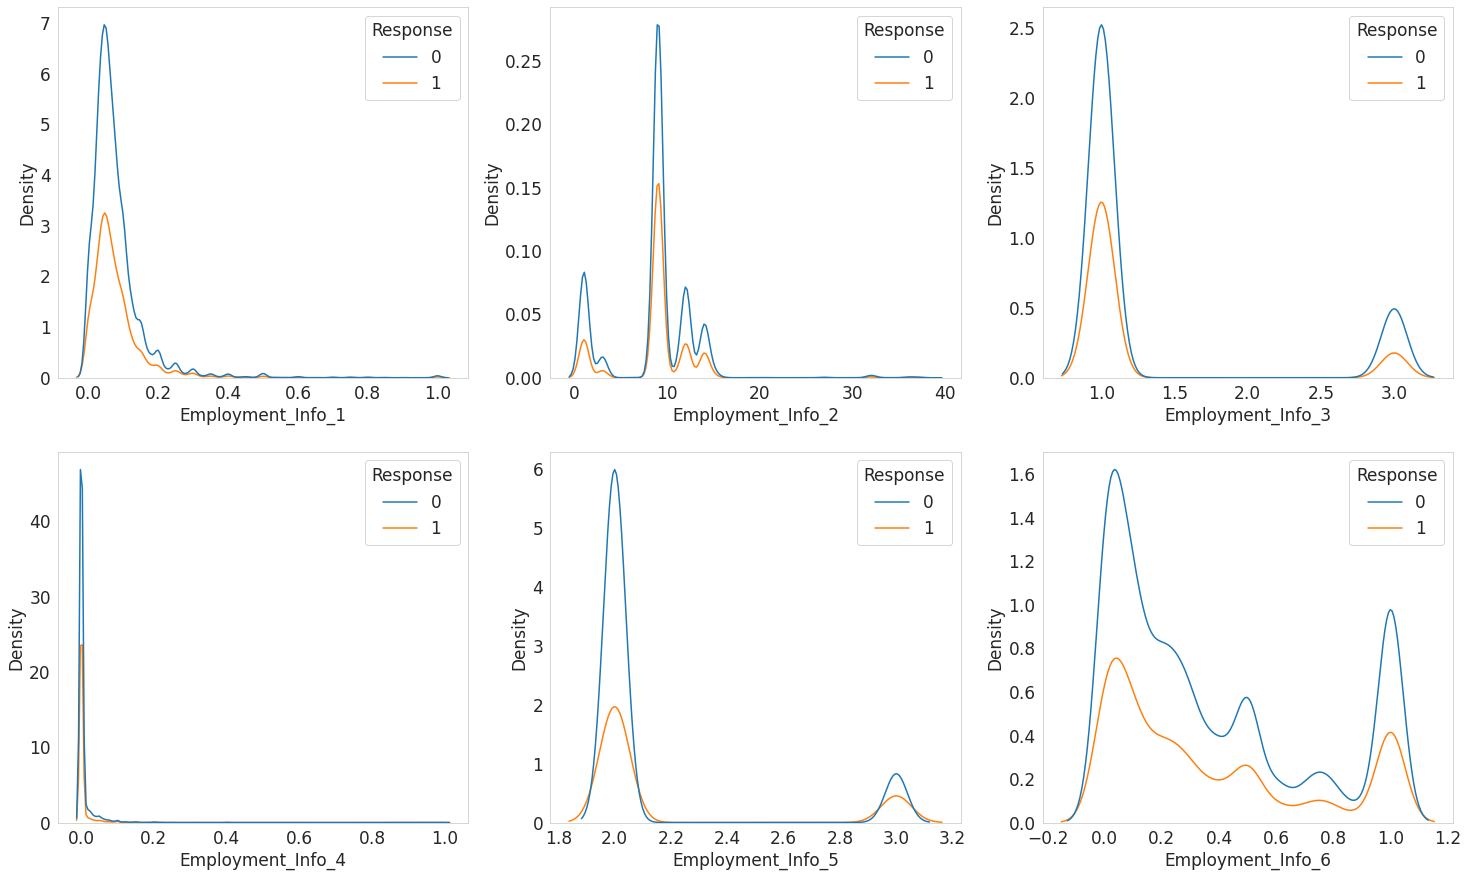

In [25]:
# plot histplot for each set of columns in EmploymentInfo listing.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
plt.rc('font', **font)
for i, column in enumerate(df[Group_EmploymentInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//3,i%3])

These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each Response group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

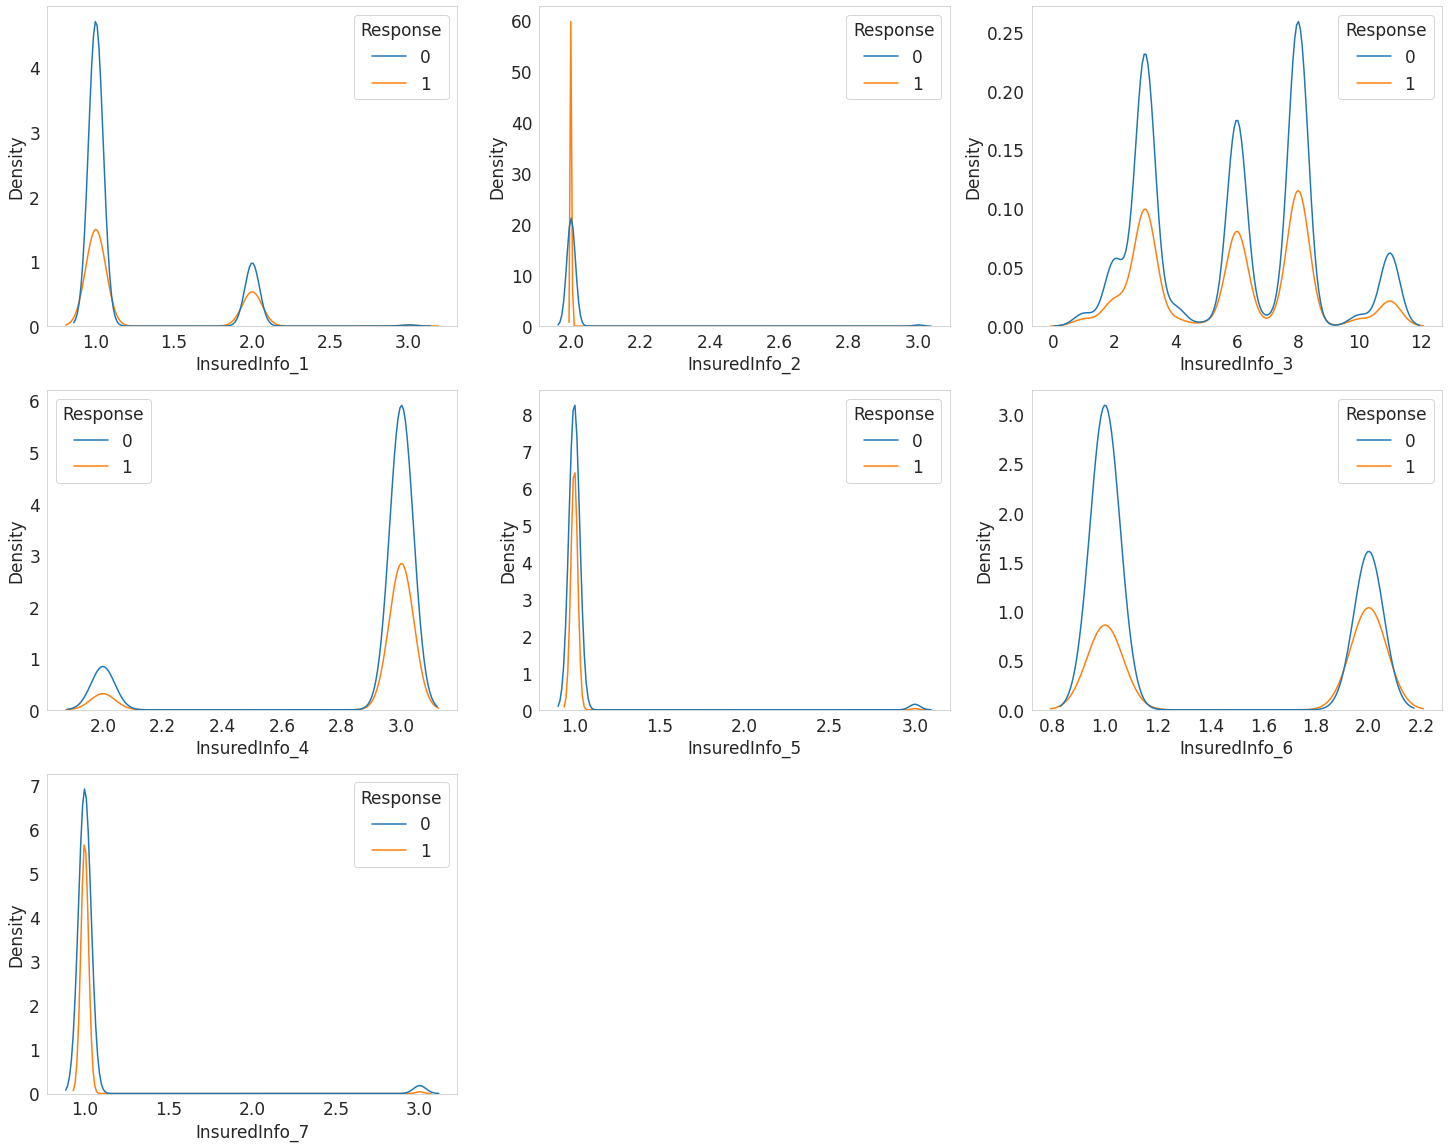

In [26]:
# plot histplot for each set of columns in InsuredInfo listing.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))
plt.rc('font', **font)
for i, column in enumerate(df[Group_InsuredInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each Response group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating. It is worth noting that InsuredInfo_2 shows a higher density with less variation for class 1 as compared to class 0

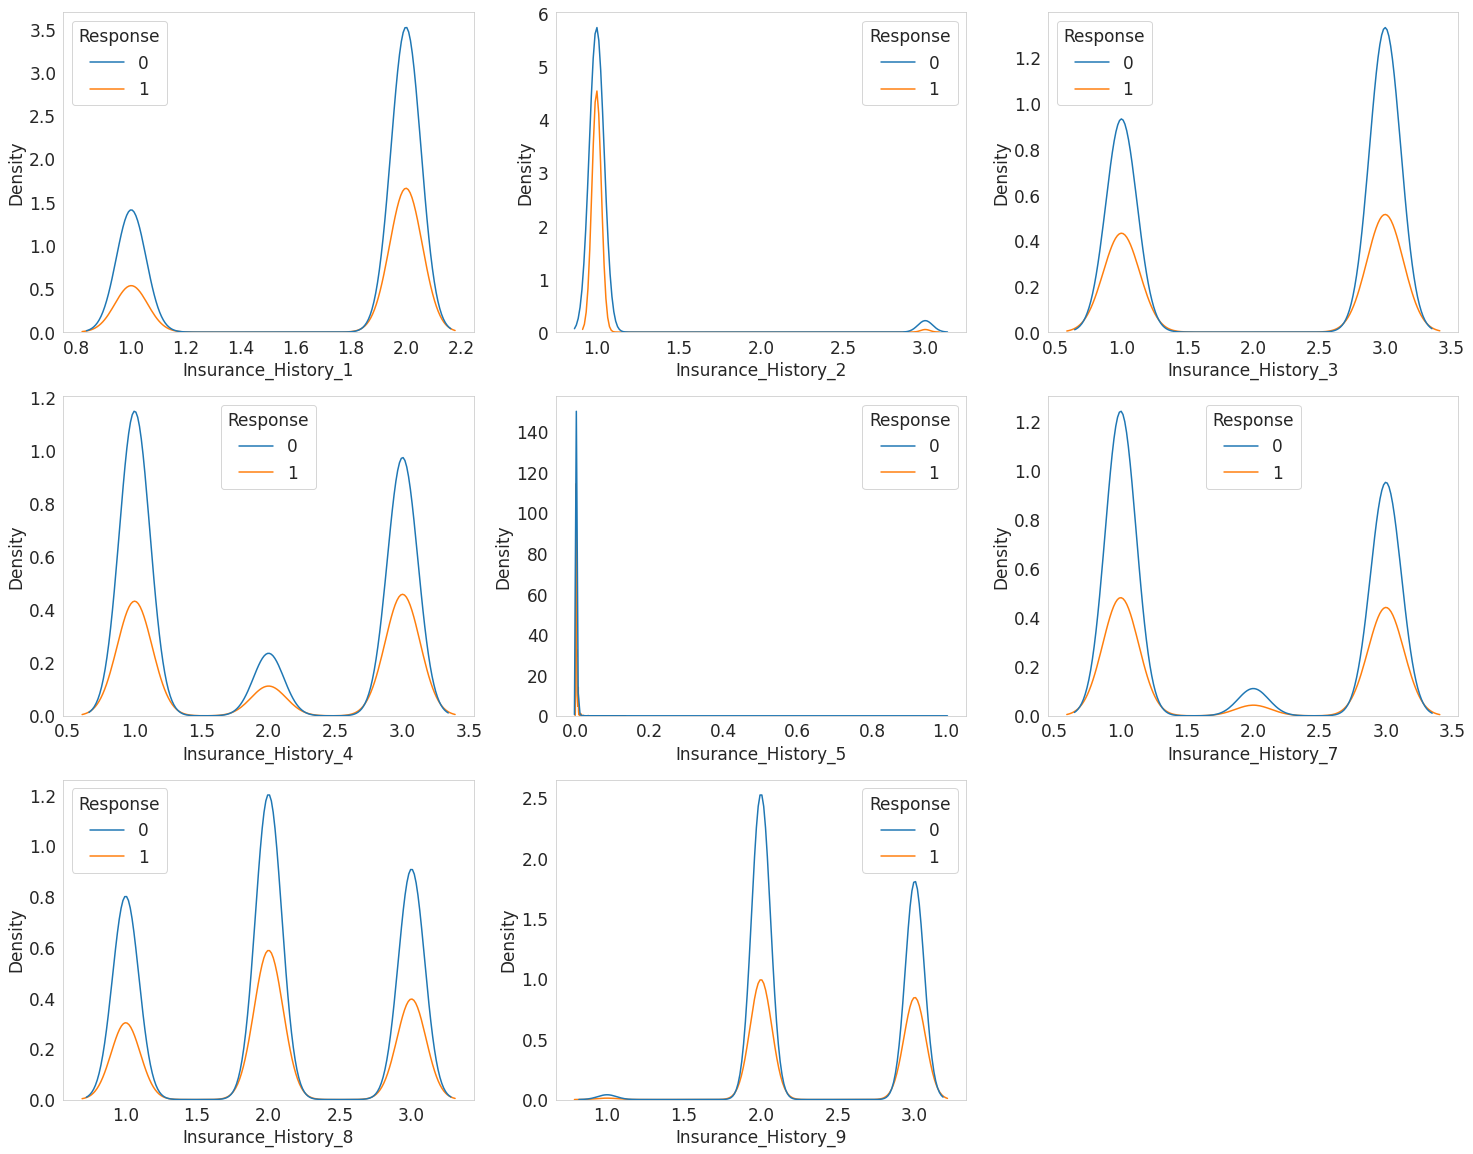

In [27]:
# plot histplot for each set of columns in InsuranceHistory listing.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))
plt.rc('font', **font)
for i, column in enumerate(df[Group_InsuranceHistoryInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//3,i%3])
    
# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[2,2])

These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each Response group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

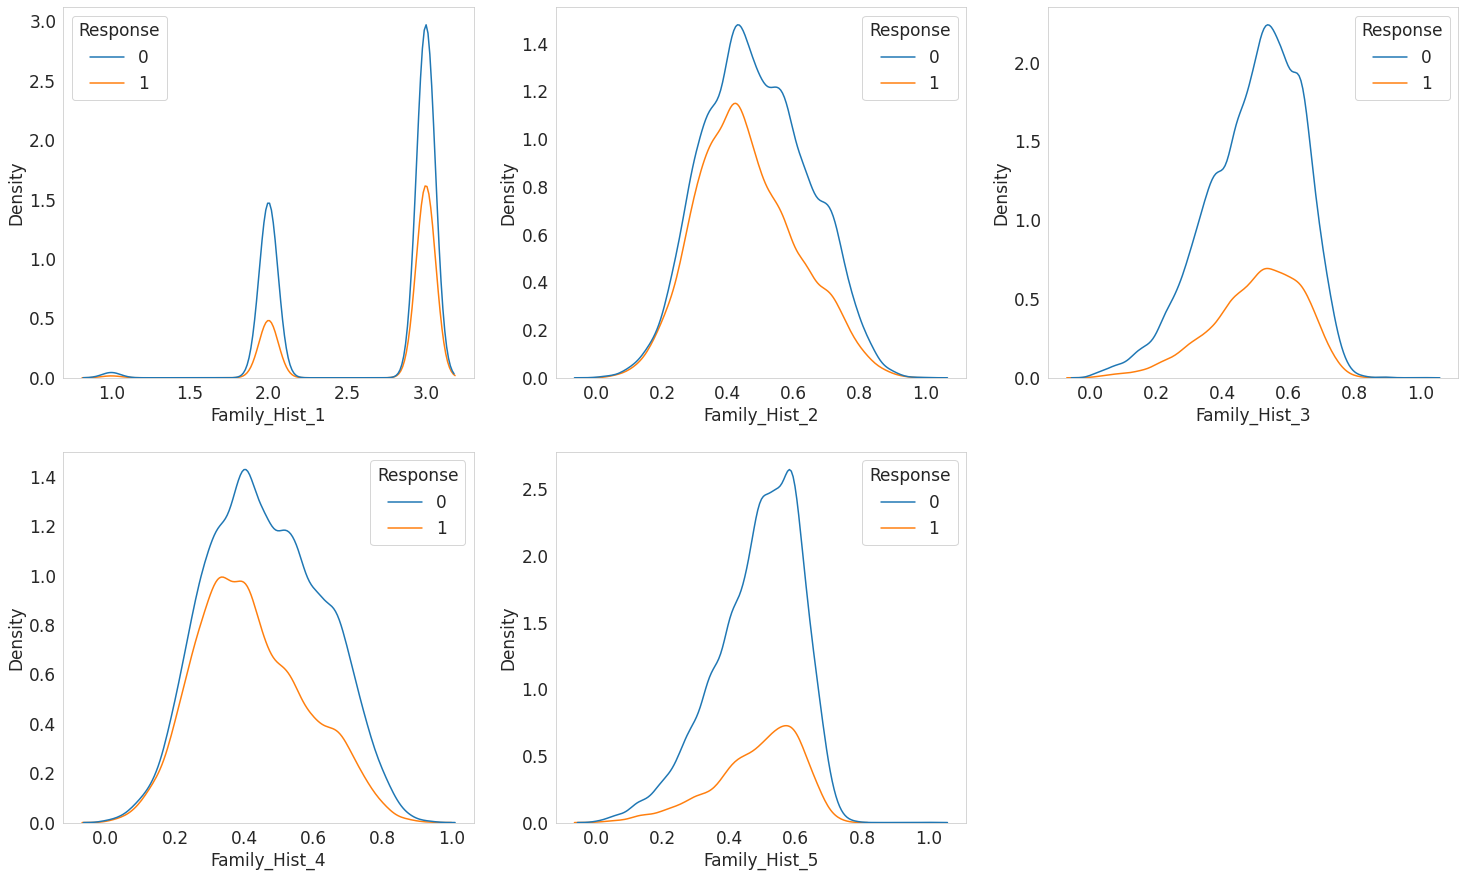

In [28]:
# plot histplot for each set of columns in FamilyHistory listing.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
plt.rc('font', **font)
for i, column in enumerate(df[Group_FamilyHistoryInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//3,i%3])
    
# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[1,2])

**Family_Hist_1**: This KDE plot shows a bimodal distribution comprised of two peaks at x=2 and x=3 (along with a very low-density curve at x=1), with the most prominent peak at x=3. However, as this feature appears to show little variation in relative densities between each of the Response classes, any variation in this feature is unlikely to individually help towards predicting an applicant's risk rating.

**Family_Hist_2** - Family_Hist_5: These KDE plots show a number of unimodal distributions which display some variation in terms of each Response group distribution's composition and structure. The majority of the distributions' densities are spread between x=0.2 and x=0.8, each cohort's distribution doesn't vary much in terms of shape and skew/kurtosis.

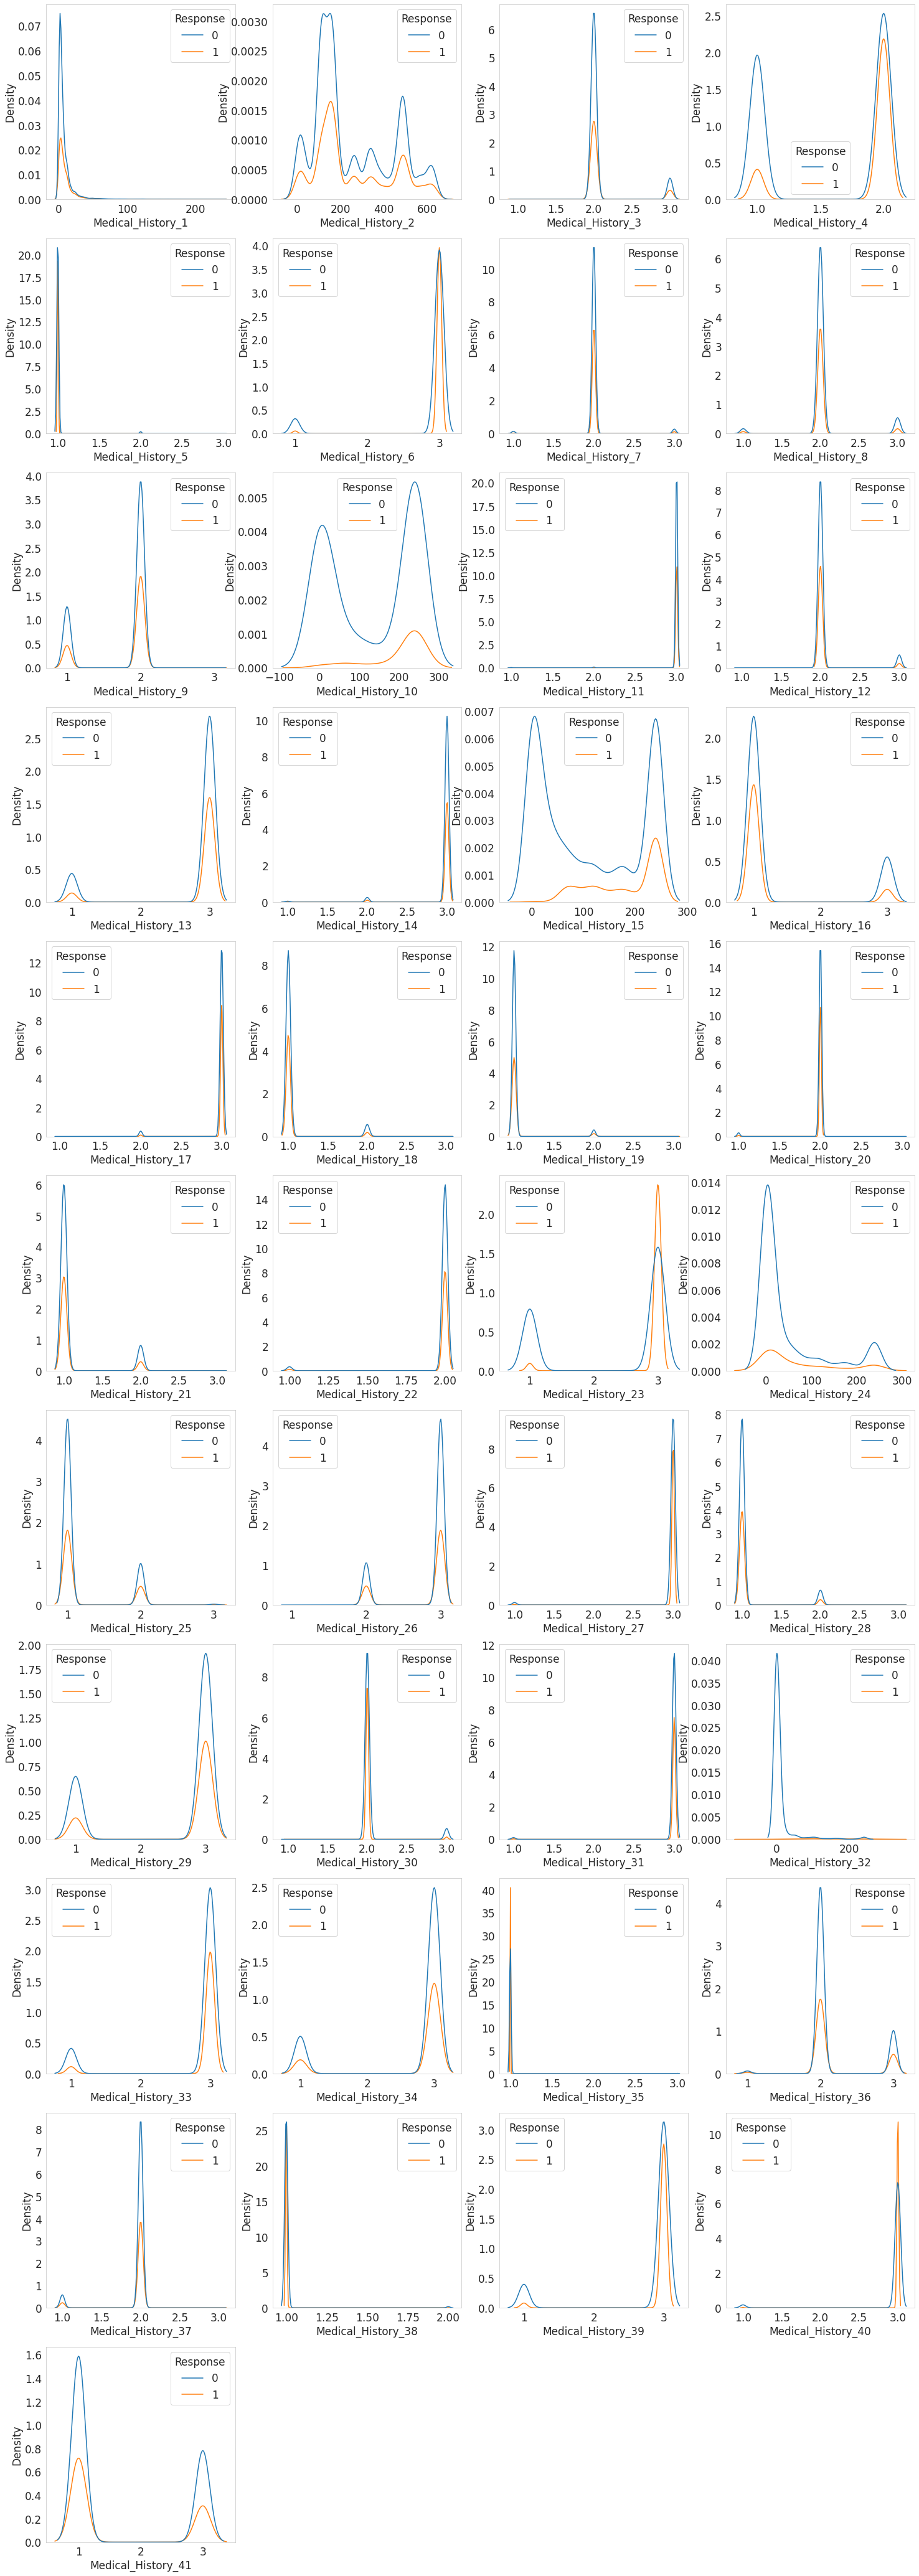

In [29]:
# plot histplot for each set of columns in FamilyHistory listing.
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(25,75))
plt.rc('font', **font)
for i, column in enumerate(df[Group_MedicalHistoryInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//4,i%4])
    
# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[10,1])
fig.delaxes(axes[10,2])
fig.delaxes(axes[10,3])

A majority of these KDE plots feature distributions that closely overlap between each Response group/cohort of applicants, and hence any variation in the underlying features is unlikely to individually lend any predictive power for determining an applicant's risk rating. However, there are a handful of notable exceptions:

**Medical_History_10/15/24**: These KDE plots appears to show multimodal distributions that features some degree of predictive distinction in terms of variance. Indicating that there are certain inputs within these features that make it unfavourable for the application in regards to the outcome of his Policy. However, it is worth noting that these features have a high proportion of missing values and thus its distribution should not be misconstructed.

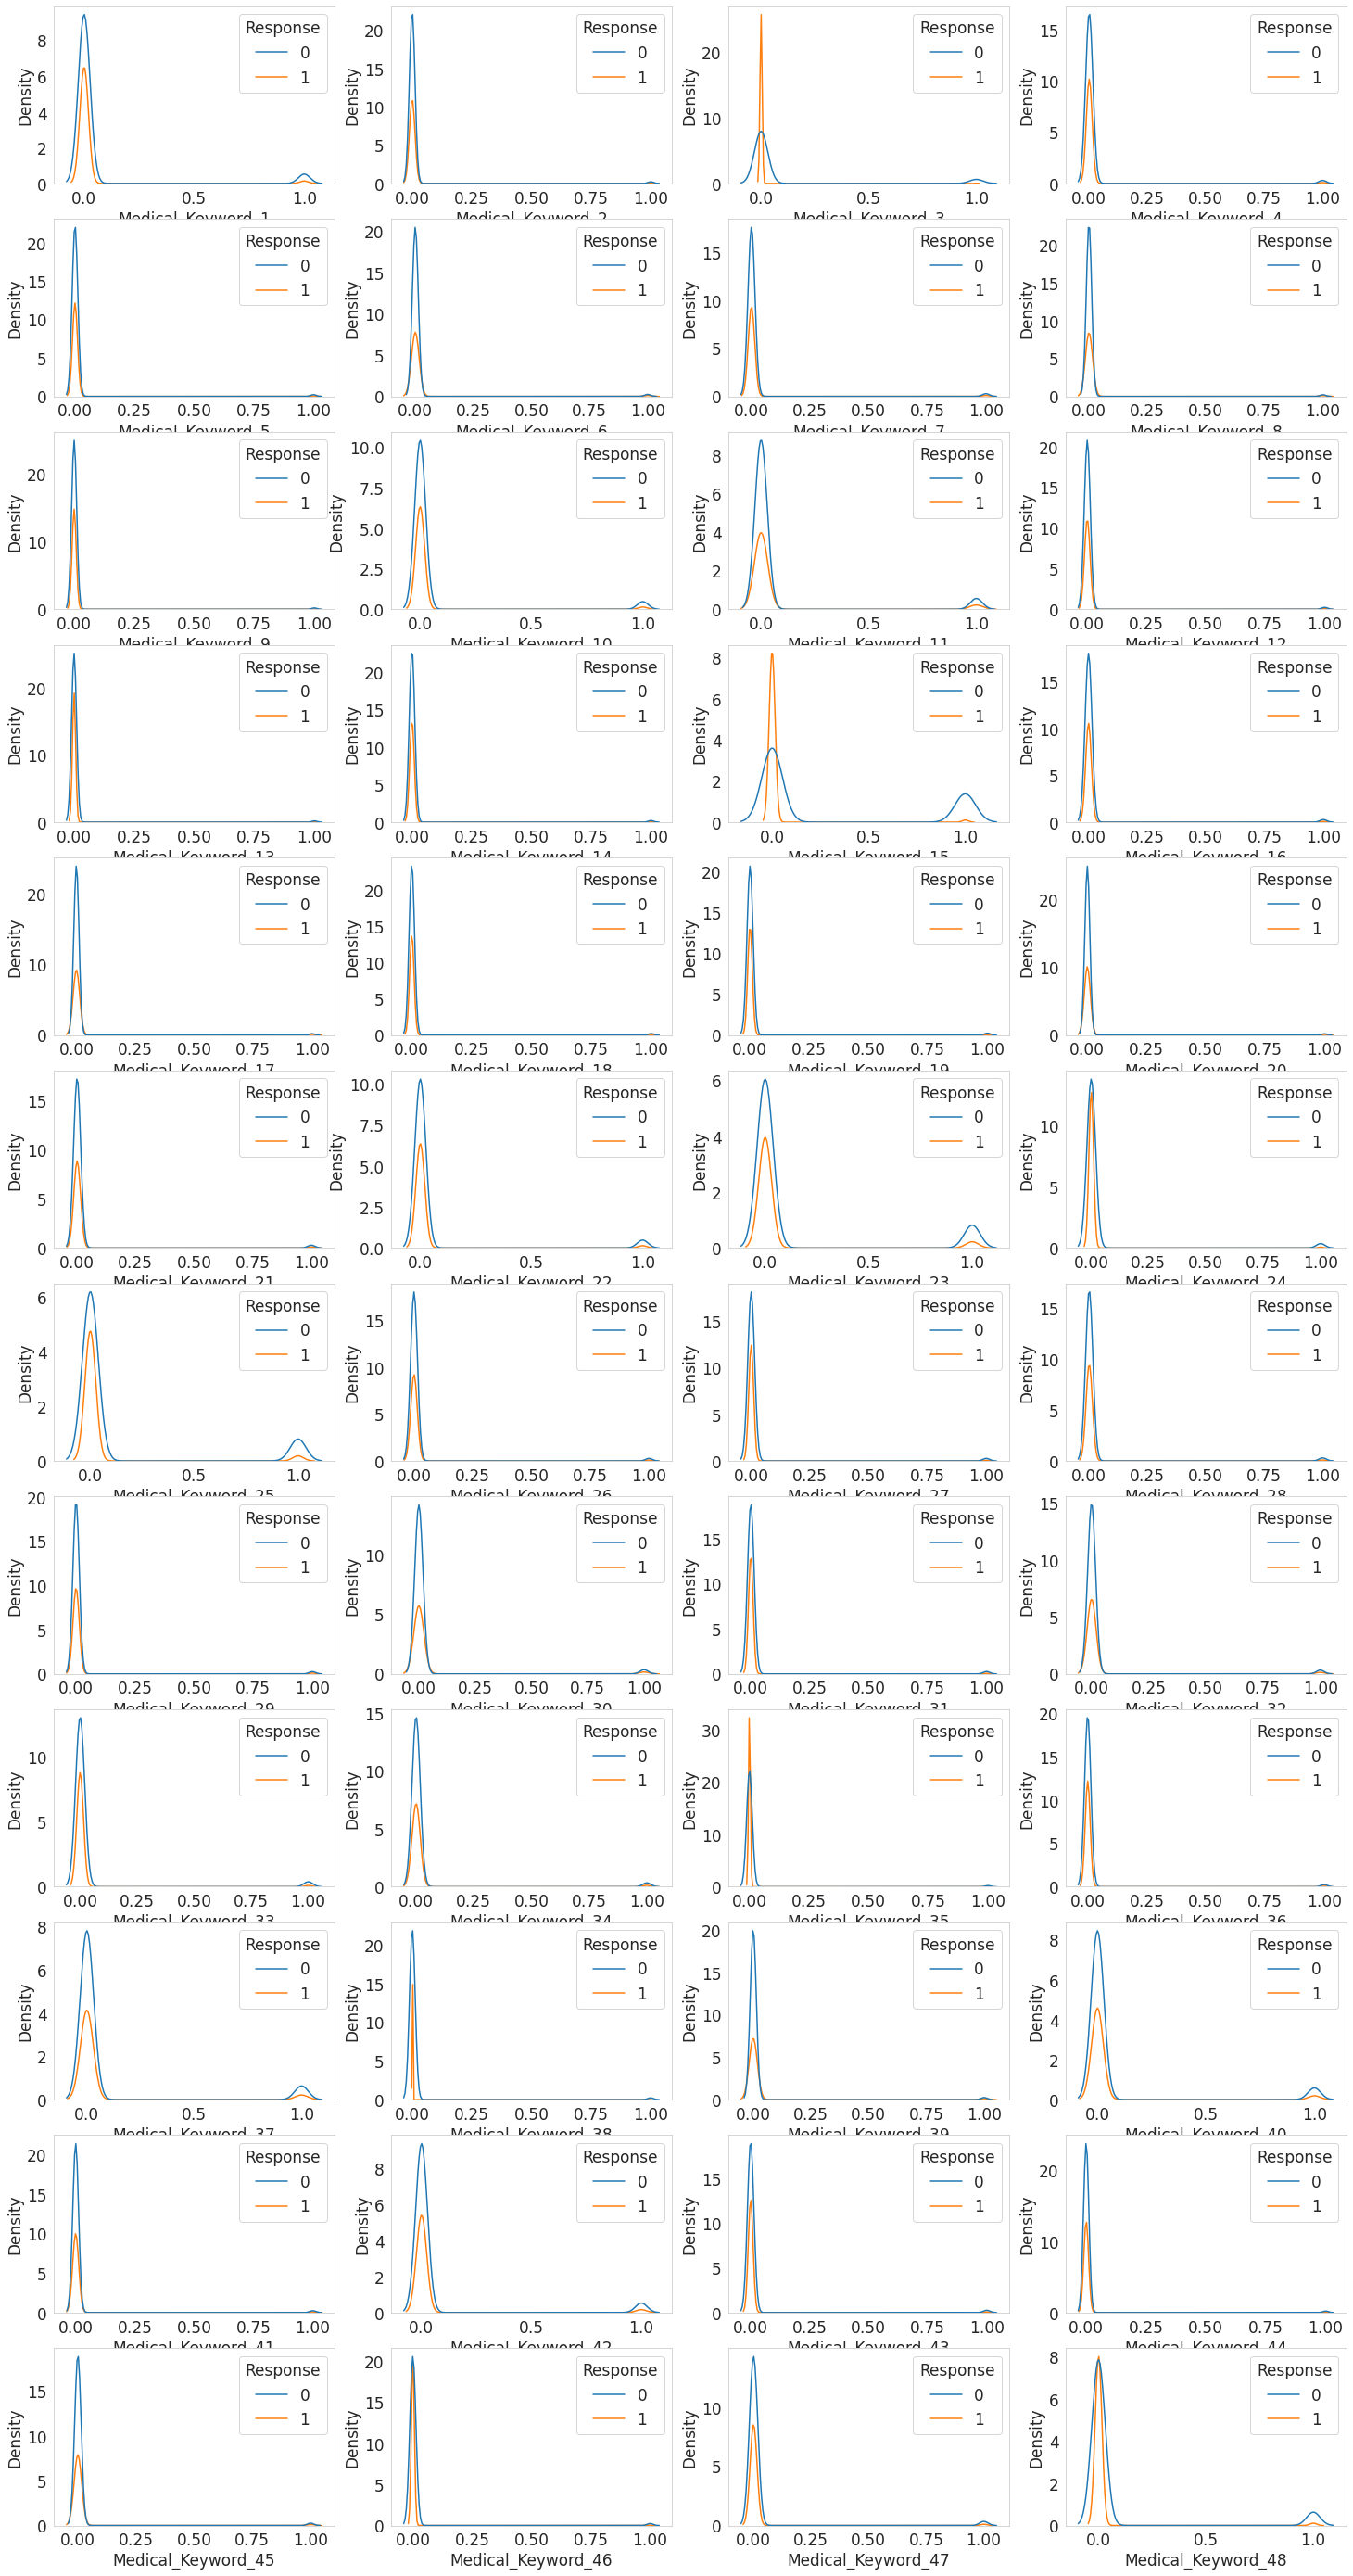

In [30]:
# plot histplot for each set of columns in FamilyHistory listing.
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(25,50))

plt.rc('font', **font)
for i, column in enumerate(df[Group_MedicalKeywordInfo].columns):
    sns.kdeplot(data=df,x=column,hue="Response", ax=axes[i//4,i%4])
    

These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each Response group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

## Correlation Heatmap

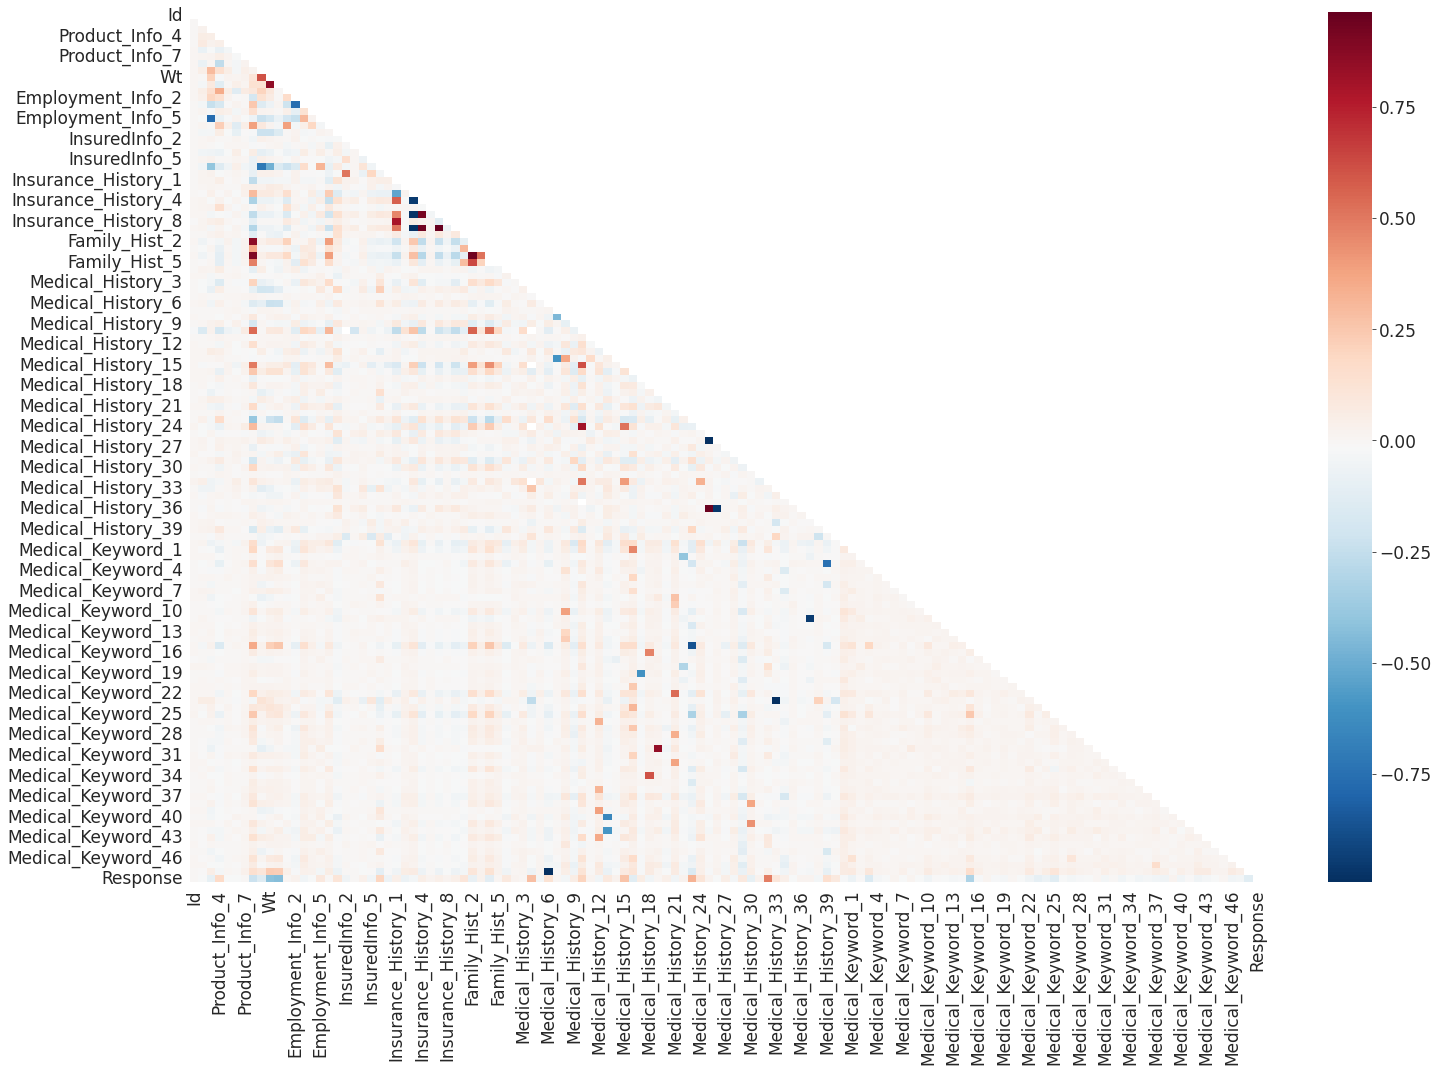

In [31]:
# Produce a correlation matrix of the dataset - then, create a mask to hide the upper-right half of the matrix.
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}

plt.rc('font', **font)
# Convert the correlation matrix into a heatmap using Seaborn.
fig = plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()
fig.savefig('temp.png', transparent=True)

From the chart above, we can infer (based on each category class (as broken down earlier):

**Product Info**: These appear to show little interaction/correlation with a majority of the other feature sets, with the exception of Employment & Applicant Info - these columns may be directly correlated as, to give an example, an applicant's employment/financial status will have an impact on what type of policy/product the applicant is applying for such as a Disability Income product which covers the loss of your income in the event of a disability. 

**Applicant Info**: These columns show a varying range of interactions with the other feature sets; the strongest anti-/correlations (excluding those within the same column set) are between a handful of the Employment, Insured History and Family History. Which technically makes up the most about our lifestyle. (Think career, existing insurance policies & FHX)

**Employment Info**: With the exception of strong correlations amongst other employment classes, this column set does not interact very strongly with the rest of the features. This is to be expected as different occupations are usually risk classified at applications. For example, a high risk job such as a Construction worker, Pilot, Firefighters vs a desk bound job.

**Insured Info**: We note that this column set does not interact very much with the rest of the other features.

**Insurance History Info**: This feature set exhibits several strong inter-correlations with other Insurance_History columns and some correlations with Family History but does not interact very much with the rest of the features. Think along the lines of "Do you have any existing policy?" & "How much are is your existing cover?"

**Medical History Info**: This column set shows a number of correlation hotspots against several other Medical_Keyword columns, as well as against most of the Applicant Info columns. (Older age , higher BMI = more medical conditions/history as to be expected)

**Medical Keyword Info**: These columns show a number of correlation hotspots against several Medical_History columns, but do not otherwise show any notable interactions with the rest of the features.

# Data cleaning 

In [32]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1       8889
Employment_Info_4       6779
Employment_Info_1         19
Medical_Keyword_19         0
Medical_Keyword_18         0
Medical_Keyword_13         0
Medical_Keyword_21         0
Medical_Keyword_20         0
Medical_Keyword_17         0
Medical_Keyword_16         0
Medical_Keyword_15         0
Medical_Keyword_14         0
Medical_Keyword_10         0
Medical_Keyword_12         0
Medical_Keyword_3          0
Medical_History_38         0
Medical_History_39         0
Medical_History_40         0
Medical_History_41         0
Medical_Keyword_1          0
Medical_Keyword_2          0
Medical_Keyword_4          0
Medical_Keyword_11         0
Medical_Keyword_5          0
Medical_Keywor

noted that some of the features specific to Medical History, Family History and Employment history are missing. 

In [33]:
# lets plot a function to view missing data as a % of the feature
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [34]:
nan_percent = missing_percent(df).sort_values(ascending = False)

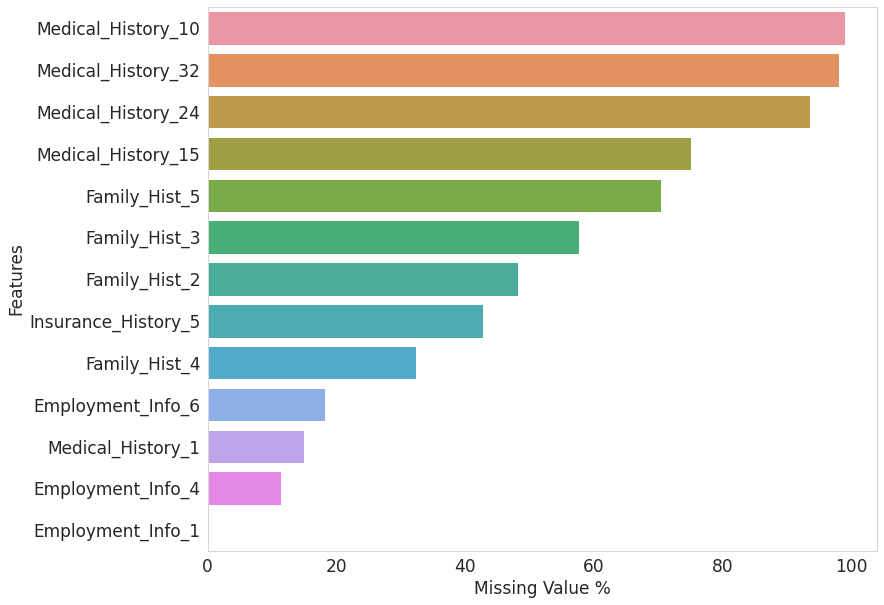

In [35]:
#plotting missing values as a % of Grand Total
fig = plt.figure(figsize=(12,10))
sns.barplot(x=nan_percent, y=nan_percent.index)
plt.xticks(rotation=0);
fig.savefig('temp.png', transparent=True)
plt.ylabel("Features")
plt.xlabel("Missing Value %")
plt.rc('font', **font);

In [36]:
#we shall drop columns that contain a high proportion of blanks/missing values (threshold at 40%)
cols_to_delete_due_to_missing_data = ['Insurance_History_5','Family_Hist_2', 'Family_Hist_3',
                                      'Family_Hist_5','Medical_History_15', 'Medical_History_24',
                                      'Medical_History_32','Medical_History_10']

df = df.drop(columns=cols_to_delete_due_to_missing_data)

In [37]:
missing_cols = df.columns[df.isnull().any()]
missing_cols

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Family_Hist_4', 'Medical_History_1'],
      dtype='object')

Lets decide which imputation technique to use to replace missing values. 

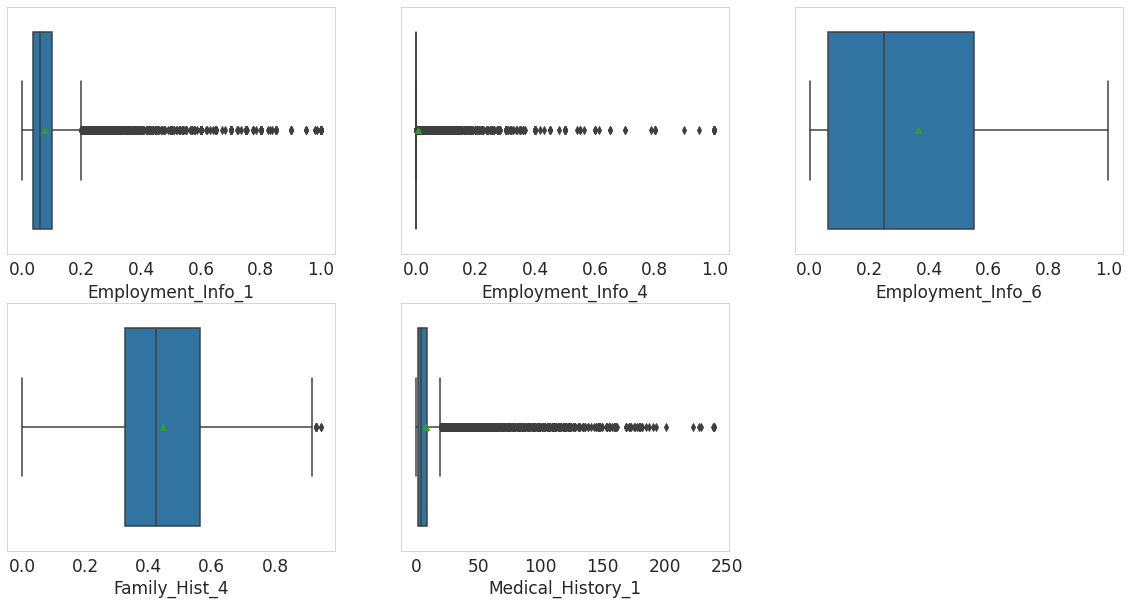

In [38]:
# Plotting boxplots to understand if we should be replacing missing values with mean or median
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
plt.rc('font', **font)

for i, column in enumerate(df[missing_cols].columns):
    #fig, ax = plt.subplots(figsize =(6,6))
    sns.boxplot( data=df, x=column, showmeans=True, ax=axes[i//3,i%3])

fig.delaxes(axes[1,2])

From the above, we can see that there are many outliers and that the data is very skewed for these missing values.We will be filling the missing values with median value instead of mean for this purpose. We need to be mindful of potential data leakage when working with the test data later.

It is recommended to use the median if your distribution is not normal, because the median is not influenced by the outliers. If your distribution is close to normal, you may use mean as a better representative.


In [39]:
# Create a function storing the median value of each columns. We will use these values to fill up test data later
def get_median(df):
    median_dict = {}
    for col in df.columns:
        median_dict[col] = df[col].median()
    return median_dict

In [40]:
#storing median value for missing values for test data later.
median_train_dict = get_median(df[missing_cols])

In [41]:
median_train_dict

{'Employment_Info_1': 0.06,
 'Employment_Info_4': 0.0,
 'Employment_Info_6': 0.25,
 'Family_Hist_4': 0.422535211,
 'Medical_History_1': 4.0}

In [42]:
# lets replace the remaining missing values with median
for column in df[missing_cols]:
    df[column].fillna(df[column].median(), inplace=True)

In [43]:
# Checking DF for abnormalities
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.000000
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.000000
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.000000
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.000000
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.000000
Product_Info_6,59381.0,2.673599,0.739103,1.0,3.000000,3.000000,3.000000,3.000000
Product_Info_7,59381.0,1.043583,0.291949,1.0,1.000000,1.000000,1.000000,3.000000
Ins_Age,59381.0,0.405567,0.197190,0.0,0.238806,0.402985,0.567164,1.000000
Ht,59381.0,0.707283,0.074239,0.0,0.654545,0.709091,0.763636,1.000000
Wt,59381.0,0.292587,0.089037,0.0,0.225941,0.288703,0.345188,1.000000


In [44]:
#checking if any remaining missing values
df.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0


In [45]:
#drop extra columns used for EDA earlier
df = df.drop(columns=['Id','Product_Info_2','BMI_types', 'Age_types', 'Height_types', 'Weight_types', 'risk_cat'])

In [46]:
df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
df.to_pickle("./data/df.pkl")